In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, f1_score
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier,export_graphviz
drive.mount('/content/drive')
dataset=pd.read_csv("/content/drive/MyDrive/dataset2.csv")
"""print (dataset.shape)
dataset=dataset.sample(frac=1, replace=False)#shuffling dataset
print (dataset.shape)"""
dataset = dataset.replace(float('-inf'), 0)


#dataset['magnitude_spectrum'] = dataset['magnitude_spectrum'].replace('-inf', dataset['magnitude_spectrum'].min())
labels=pd.DataFrame(dataset["label"])
dataset=dataset.drop("label",axis=1)
import graphviz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


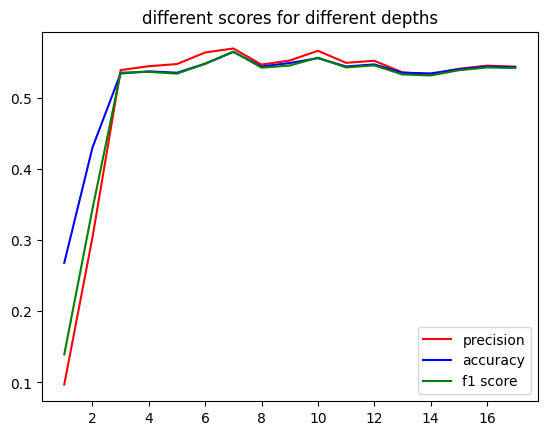

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

acc=[]
pre=[]
f1=[]
for j in range(1,18):
  tree = DecisionTreeClassifier(criterion='gini', max_depth=j, min_samples_split=5, min_samples_leaf=6)
  tree.fit(X_train, y_train['label'].ravel())
  y_pred = tree.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')

  accuracy = accuracy_score(y_test, y_pred)

  f1_s = f1_score(y_test, y_pred, average='weighted')

  pre.append(precision)
  acc.append(accuracy)
  f1.append(f1_s)
import matplotlib.pyplot as plt
import numpy as np
x=np.array(range(1,18))
plt.plot(x,pre,c="r",label="precision")
plt.plot(x,acc,c="b",label="accuracy")
plt.plot(x,f1,c="g",label="f1 score")
plt.title('different scores for different depths')
plt.legend()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)
keys=list(dataset.keys())
print (keys)
labels_=labels['label'].unique()


['brightness', 'contrast', 'pattern', 'color_difference', 'edge_density', 'fractional_dimension', 'b', 'g', 'r', 'var_b', 'var_g', 'var_r', 'magnitude_spectrum', 'hist_b', 'hist_g', 'hist_r']


here we classify our data points considerig 6 classes using entropy

In [3]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=5, min_samples_leaf=2)
tree.fit(X_train, y_train['label'].ravel())


DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       min_samples_split=5)

In [4]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)


Precision:  0.5124676672063345
Accuracy:  0.5155945419103314
F1 Score:  0.5133206392380839
[[108  15   8  26   8   1]
 [ 26  78  44   5   5   7]
 [  5  40  82   2  11  19]
 [ 16   5   2 105  31  10]
 [ 10  22  12  34  69  47]
 [  3  12  20  10  41  87]]


here we classify our data points considerig 6 classes using gini

In [17]:

tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)
tree.fit(X_train, y_train['label'].ravel())
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)


Precision:  0.5472719361422094
Accuracy:  0.5370370370370371
F1 Score:  0.5382249828511582
[[104  21   4  22  14   1]
 [ 14 103  34   1   9   4]
 [  4  60  71   2  10  12]
 [ 17   5   2 104  31  10]
 [  8  35  14  22  82  33]
 [  3  14  20  12  37  87]]


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_split=5, min_samples_leaf=2)
tree.fit(X_train, y_train['label'].ravel())
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)


then we convert labels to binary

In [18]:
for index, row in labels.iterrows():
    if "fake" in row["label"]:
        row["label"]="fake"
    else :
        row["label"]="real"

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

and fit the tree using gini on binary classification

In [8]:
keys=list(dataset.keys())
print (keys)
labels_=labels['label'].unique()
tree = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_split=5, min_samples_leaf=2)
tree.fit(X_train, y_train['label'].ravel())
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=keys,
                           class_names=labels_,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("/content/drive/MyDrive/decision_tree_graph_gini_binary_enhanced")

['brightness', 'contrast', 'pattern', 'color_difference', 'edge_density', 'fractional_dimension', 'b', 'g', 'r', 'var_b', 'var_g', 'var_r', 'magnitude_spectrum', 'hist_b', 'hist_g', 'hist_r']
Precision:  0.8237164676660236
Accuracy:  0.8206627680311891
F1 Score:  0.8206777600480882
[[420  70]
 [114 422]]


'/content/drive/MyDrive/decision_tree_graph_gini_binary_enhanced.pdf'

using entropy

In [9]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=5, min_samples_leaf=2)
tree.fit(X_train, y_train['label'].ravel())


DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=5)

In [10]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)


Precision:  0.7873112939106311
Accuracy:  0.7787524366471735
F1 Score:  0.7757793261285889
[[328 162]
 [ 65 471]]


we see that even if we use one best feature we still get 1.0 accuracy

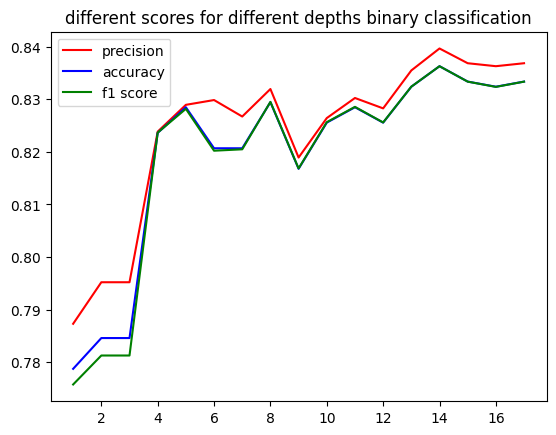

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

acc=[]
pre=[]
f1=[]
for j in range(1,18):
  tree = DecisionTreeClassifier(criterion='gini', max_depth=j, min_samples_split=5, min_samples_leaf=6)
  tree.fit(X_train, y_train['label'].ravel())
  y_pred = tree.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')

  accuracy = accuracy_score(y_test, y_pred)

  f1_s = f1_score(y_test, y_pred, average='weighted')

  pre.append(precision)
  acc.append(accuracy)
  f1.append(f1_s)
import matplotlib.pyplot as plt
import numpy as np
x=np.array(range(1,18))
plt.plot(x,pre,c="r",label="precision")
plt.plot(x,acc,c="b",label="accuracy")
plt.plot(x,f1,c="g",label="f1 score")
plt.title('different scores for different depths binary classification')
plt.legend()

In [ ]:
-